In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind as ttest
import numpy as np

In [2]:
kirc_cancer = pd.read_csv("Project_01_Data\Project_Data\kirc-rsem-fpkm-tcga-t_paired.txt",sep="\t")
kirc_healthy = pd.read_csv("Project_01_Data\Project_Data\kirc-rsem-fpkm-tcga_paired.txt",sep="\t")

In [5]:
kirc_cancer

,Hugo_Symbol,Entrez_Gene_Id,TCGA-CJ-5680,TCGA-CZ-5453,TCGA-CW-5591,TCGA-A3-3387,TCGA-CZ-5982,TCGA-CJ-5679,TCGA-CZ-5984,TCGA-CJ-5681,...,TCGA-CZ-5458,TCGA-CJ-6030,TCGA-CZ-5456,TCGA-B0-5402,TCGA-B0-5703,TCGA-CZ-5987,TCGA-CZ-5466,TCGA-CJ-6033,TCGA-CZ-5461,TCGA-B2-5636
0,METTL21B,25895,234.57,299.25,171.45,285.03,265.87,463.65,348.71,195.72,...,231.32,244.57,551.56,493.56,361.04,400.71,444.72,141.02,320.80,358.54
1,VSTM2B,342865,0.00,0.00,0.00,0.73,0.00,0.00,0.39,334.46,...,0.00,0.00,0.38,0.39,0.00,0.00,0.40,3.00,0.00,0.00
2,TXNDC16,57544,57.89,182.55,122.64,100.13,189.02,69.52,133.36,129.69,...,181.28,153.34,103.69,212.78,157.68,48.18,97.36,78.34,255.00,199.85
3,ZBTB49,166793,39.50,77.79,35.25,59.55,94.67,23.42,59.13,56.68,...,53.19,45.21,46.84,70.51,64.34,51.35,60.82,41.22,61.68,65.72
4,SYT1,6857,3.00,0.36,7.63,3.14,0.33,1.62,1.11,29.06,...,2.51,8.19,2.51,1.83,0.39,0.00,3.06,0.36,1.06,17.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19211,TTC37,9652,633.73,629.35,679.29,743.43,791.35,551.56,872.10,733.19,...,813.63,607.87,490.14,1119.56,532.74,525.39,674.59,435.55,713.11,633.73
19212,UXT,8409,2956.17,3212.66,2701.35,3639.70,2451.44,6426.31,4802.93,2935.74,...,5831.91,4123.49,3820.70,3212.66,4388.98,3491.39,4481.23,5751.61,4010.71,2627.46
19213,ALKBH3,221120,353.59,547.75,376.41,536.45,426.57,409.15,466.88,353.59,...,693.58,674.59,490.14,540.19,536.45,429.54,514.56,551.56,269.60,518.15
19214,BEGAIN,57596,7.51,10.71,14.24,5.73,8.06,2.10,2.68,0.35,...,10.63,2.97,3.69,7.46,2.41,0.41,13.32,3.38,3.29,77.79


In [6]:
kirc_healthy

,Hugo_Symbol,Entrez_Gene_Id,TCGA-CJ-5680,TCGA-CZ-5453,TCGA-CW-5591,TCGA-A3-3387,TCGA-CZ-5982,TCGA-CJ-5679,TCGA-CZ-5984,TCGA-CJ-5681,...,TCGA-CZ-5458,TCGA-CJ-6030,TCGA-CZ-5456,TCGA-B0-5402,TCGA-B0-5703,TCGA-CZ-5987,TCGA-CZ-5466,TCGA-CJ-6033,TCGA-CZ-5461,TCGA-B2-5636
0,METTL21B,25895,237.86,155.50,309.83,629.35,426.57,309.83,267.73,371.22,...,98.73,429.54,115.16,177.53,199.85,221.86,262.20,109.66,134.30,368.65
1,VSTM2B,342865,0.00,0.00,0.38,0.00,0.91,0.38,2.48,2.53,...,0.35,0.00,0.00,2.03,1.06,0.74,0.00,0.00,0.00,2.01
2,TXNDC16,57544,92.05,199.85,171.45,82.29,108.14,128.79,119.26,120.94,...,217.27,115.16,124.37,92.70,138.10,109.66,118.43,98.04,166.73,124.37
3,ZBTB49,166793,87.65,69.03,25.35,35.76,40.07,68.55,84.63,68.07,...,50.98,43.32,35.00,46.50,72.52,59.13,42.71,39.50,55.89,59.55
4,SYT1,6857,27.05,138.10,0.73,12.83,27.25,17.25,23.76,33.78,...,60.39,10.79,57.08,27.05,25.35,68.55,13.12,16.03,23.25,25.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19211,TTC37,9652,764.36,743.43,1023.00,521.76,703.28,679.29,728.11,674.59,...,638.15,559.28,518.15,599.49,624.99,728.11,603.67,480.04,656.11,769.69
19212,UXT,8409,2956.17,2997.45,4328.55,4543.80,2935.74,3168.41,2855.44,3419.52,...,3212.66,3419.52,3515.68,3395.89,4181.07,2997.45,3589.58,3372.43,3257.52,3018.30
19213,ALKBH3,221120,476.71,507.46,356.05,426.57,389.72,540.19,400.71,466.88,...,591.22,476.71,493.56,423.61,656.11,463.65,493.56,417.77,480.04,395.18
19214,BEGAIN,57596,31.22,12.55,4.10,7.82,7.69,12.83,13.52,49.91,...,3.14,11.04,2.23,27.25,2.14,8.06,9.06,17.13,10.31,25.91


In [ ]:
# # take common genes with non zero count in all samples
# non_zero_kirc_d = kirc_d[kirc_d.iloc[:,2:].sum(1) != 0]["Hugo_Symbol"]
# non_zero_kirc_h = kirc_h[kirc_h.iloc[:,2:].sum(1) != 0]["Hugo_Symbol"]

# genes = np.intersect1d(non_zero_kirc_h,non_zero_kirc_d)
# kirc_h = kirc_h[kirc_h["Hugo_Symbol"].isin(genes)]
# kirc_d = kirc_d[kirc_d["Hugo_Symbol"].isin(genes)]

# print(kirc_d.shape)
# print(kirc_h.shape)

In [9]:
# calculate average gene expression for each gene
# across all samples
ge_c = kirc_cancer.iloc[:,2:].mean(axis=1)
ge_h = kirc_healthy.iloc[:,2:].mean(axis=1)
# fold change = mean(cancer) / mean(healthy)
fc = ge_c / ge_h

In [10]:
# hypothesis testing (t-test)
pvalues = ttest(kirc_healthy.iloc[:,2:].values,kirc_cancer.iloc[:,2:].values, axis=1)[1]

In [11]:
degs = pd.DataFrame({
    "Hugo_Symbol": kirc_cancer["Hugo_Symbol"].values,
    "p-values": pvalues,
    "-log10(p-values)": - np.log10(pvalues),
    "FC": fc,
    "log2(FC)": np.log2(fc),

})
degs.reset_index(drop=True)

c:\Users\zeyad\Desktop\bioinformatics\.venv\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Hugo_Symbol,p-values,-log10(p-values),FC,log2(FC)
0,METTL21B,1.254126e-03,2.901659,1.261731,0.335405
1,VSTM2B,3.496758e-01,0.456334,10.843162,3.438714
2,TXNDC16,9.738503e-01,0.011508,1.002137,0.003079
3,ZBTB49,2.420696e-01,0.616060,1.062273,0.087154
4,SYT1,1.153493e-07,6.937985,0.152477,-2.713338
...,...,...,...,...,...
19211,TTC37,2.024250e-01,0.693736,1.055134,0.077426
19212,UXT,1.436925e-04,3.842566,1.227882,0.296172
19213,ALKBH3,1.748909e-01,0.757233,1.049009,0.069027
19214,BEGAIN,5.023259e-02,1.299014,0.729132,-0.455748


In [12]:
def filter_degs(data, x="log2(FC)", y="-log10(p-values)", p_threshold=1.3, t_threshold=0.6):
    
    decreased_degs = data[(data[y] >= p_threshold) & (data[x] <= -t_threshold)][[x,y]]
    increased_degs = data[(data[y] >= p_threshold) & (data[x] >= t_threshold)][[x,y]]
    # unchanged_degs = data[~(((data[y] >= p_threshold) & (data[x] <= -t_threshold)) | ((data[y] >= p_threshold) & (data[x] >= t_threshold)))]
    unchanged_degs = data[(data[y] < p_threshold) | (data[x].abs() < t_threshold)]
    
    return decreased_degs, increased_degs, unchanged_degs

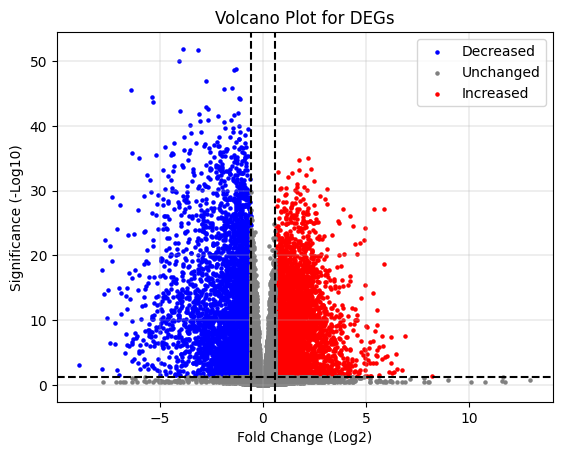

In [13]:
# blue genes are significant genes with decreased fold change
# red genes are significant genes with increased fold change
# gray genes are insignifcant or have unchanged fold change
def volcano_plot(decreased_degs, increased_degs, unchanged_degs, x="log2(FC)", y="-log10(p-values)", p_threshold=1.3, t_threshold=0.6):

    dec = plt.scatter(decreased_degs[x], decreased_degs[y],s=5,c="blue")
    inc = plt.scatter(increased_degs[x], increased_degs[y],s=5,c="red")
    unc = plt.scatter(unchanged_degs[x], unchanged_degs[y],s=5,c="gray")

    plt.grid(linewidth=0.3)
    plt.axhline(p_threshold,c="black",linestyle="--")
    plt.axvline(t_threshold,c="black",linestyle="--")
    plt.axvline(-t_threshold,c="black",linestyle="--")
    plt.title("Volcano Plot for DEGs")
    plt.xlabel("Fold Change (Log2)")
    plt.ylabel("Significance (-Log10)")
    plt.legend((dec, unc, inc),("Decreased","Unchanged","Increased"))
    
volcano_plot(*filter_degs(degs))